In [121]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [122]:
# class linearRegression() :
      
#     def __init__(self, learning_rate, iterations) :
#         self.learning_rate = learning_rate
#         self.iterations = iterations
        
              
#     def fit(self, X, Y) :
#         self.sampleNumb, self.featuresNumb = X.shape 
#         self.weight = np.zeros(self.featuresNumb)  
#         self.bias = 0  
#         self.X = X 
#         self.Y = Y
                  
#         for i in range(self.iterations) :             
#             self.weights()             
#         return self
      
#     def weights(self) :
#         Y_pred = self.predict(self.X)
#         weightGradient = - (2 * (self.X.T).dot(self.Y - Y_pred )) / self.sampleNumb
#         biasGradient = - 2 * np.sum(self.Y - Y_pred) / self.sampleNumb
#         self.weight = self.weight - self.learning_rate * weightGradient
#         self.bias = self.bias - self.learning_rate * biasGradient
#         return self
      
#     def predict(self, X) :
#         # return X.dot(self.weight) + self.bias
#         return np.dot(X, self.weight) + self.bias

In [123]:
# class linearRegression():

#     def __init__(self, learning_rate, iterations):
#         self.learning_rate = learning_rate
#         self.iterations = iterations
        
#     def fit(self, X, Y):
#         # Add a column of ones to X for the intercept term
#         X = np.insert(X, 0, 1, axis=1)
        
#         # Initialize the weights to zero
#         self.weights = np.zeros(X.shape[1])
        
#         # Perform gradient descent for the specified number of iterations
#         for i in range(self.iterations):
#             Y_pred = np.dot(X, self.weights)
#             error = Y - Y_pred
#             gradient = np.dot(X.T, error) / X.shape[0]
#             self.weights += self.learning_rate * gradient
        
#         return self
        
#     def predict(self, X):
#         # Add a column of ones to X for the intercept term
#         X = np.insert(X, 0, 1, axis=1)
#         return np.dot(X, self.weights)


In [124]:
class linearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        
    def fit(self, X_train, Y_train):
        print("TESTT")
        # Add a column of ones to X for the intercept term
        X = np.insert(X_train, 0, 1, axis=1)
        
        # Initialize the weights to zero
        self.weights = np.zeros(X.shape[1])
        
        # Perform gradient descent for the specified number of iterations
        for i in range(self.iterations):
            Y_pred = np.dot(X, self.weights)
            error = Y_train - Y_pred
            gradient = - (2 * (X.T).dot(error)) / X.shape[0]
            self.weights = self.weights - self.learning_rate * gradient
        
        return self
        
    def predict(self, X_test):
        # Add a column of ones to X for the intercept term
        X_test = np.insert(X_test, 0, 1, axis=1)
        return np.dot(X_test, self.weights)


In [125]:
modelEncoder = LabelEncoder()
transmissionEncoder = LabelEncoder()
fuelTypeEncoder = LabelEncoder()
scaler = MinMaxScaler()

def dataset(brand):
    file = pd.read_csv(brand, quotechar='"', skipinitialspace=True)

    for i in ['year']:
        q75,q25 = np.percentile(file.loc[:,i],[75,25])
        IQR = q75-q25
    
        max = q75+(1.5*IQR)
        min = q25-(1.5*IQR)
    
        file.loc[file[i] < min, i] = np.nan
        file.loc[file[i] > max, i] = np.nan

    file = file.dropna(axis = 0)

    modelEncoder.fit(file["model"])
    file["model"] = modelEncoder.transform(file["model"])
    
    transmissionEncoder.fit(file["transmission"])
    file["transmission"] = transmissionEncoder.transform(file["transmission"])
    
    fuelTypeEncoder.fit(file["fuelType"])
    file["fuelType"] = fuelTypeEncoder.transform(file["fuelType"])

    file = file.head(5000) # Limits dataset size

    X = file.drop(columns = ['price'])
    Y = file.price
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)
    
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # print(list(fuelTypeEncoder.classes_))
    print(X_test.size)

    return  X_train, X_test, Y_train, Y_test

In [126]:
X_train, X_test, Y_train, Y_test = dataset("../UKUsedCarDataSet/audi.csv") # Use Audi dataset as default for KNN analysis

10000


TESTT
3750


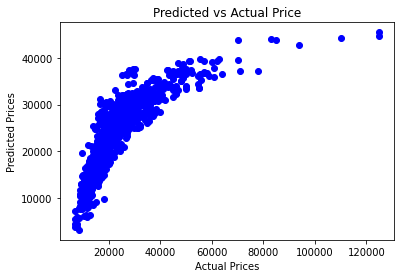

In [127]:
model = linearRegression( iterations = 1000, learning_rate = 0.01 )
model.fit( X_train, Y_train )
model.fit( X, y )
Y_pred = model.predict( X_test )

# print( "Predicted values ", np.round( Y_pred, 2 ) ) 
# print( "Real values      ", Y_test )
print(Y_train.size)
plt.scatter( Y_test, Y_pred, color = 'blue' )
# plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Predicted vs Actual Price' )
plt.xlabel( 'Actual Prices' )
plt.ylabel( 'Predicted Prices' )

plt.show()

In [128]:
# print(X_test.shape)
# for i in range(8):
#     plt.scatter(X_test[:,i], Y_test, color='red')
#     plt.scatter(X_test[:,i], Y_pred, color='blue')

# # Plot the line of best fit
# plt.plot(X_test[:,0], model.predict(X_test), color='black')

# plt.show()

In [129]:
def rmse(test, pred):
    MSE = np.square(np.subtract(test, pred)).mean()
    return sqrt(MSE)

In [130]:
def evaluation(train, test, yTrain, yTest):    
    y_pred =  model.predict(test)
    error = rmse(yTest, y_pred) 
    print('The RMSE value is:', round(error, 2))
    # for i in range(len(y_pred)):
    #     print("\nOriginal value:", yTest.iloc[i], "vs the predicted value:", y_pred[i])
    #     print("The difference is:", yTest.iloc[i] - y_pred[i])

    file2 = pd.read_csv("../UKUsedCarDataSet/audi.csv", quotechar='"', skipinitialspace=True)
    mean= np.mean(file2["price"])

    print("R VALUE:", 1 - (error/mean))
    
evaluation(X_train, X_test, Y_train, Y_test)

#rmse: 5125.277827632167
#rmse with 5000: 7038.9346097461
#rmse without outliers: 7037.810592242798

The RMSE value is: 7037.81
R VALUE: 0.6926275318832609


In [131]:
# inputPred = []
# entries = []

# def userInput():
#     chooseBrand = input("Choose your car brand: Audi, BMW, Ford, Hyundai, Mercedes, Skoda, Toyota, Vauxhall or Volkswagen \n")
    
#     if chooseBrand == "Audi":
#         return "../UKUsedCarDataSet/audi.csv"
#     elif chooseBrand == "BMW":
#         return "../UKUsedCarDataSet/bmw.csv"
#     elif chooseBrand == "Ford":
#         return "../UKUsedCarDataSet/ford.csv"
#     elif chooseBrand == "Hyundai":
#         return "../UKUsedCarDataSet/hyundi.csv"
#     elif chooseBrand == "Mercedes":
#         return "../UKUsedCarDataSet/merc.csv"
#     elif chooseBrand == "Skoda":
#         return "../UKUsedCarDataSet/skoda.csv"
#     elif chooseBrand == "Toyota":
#         return "../UKUsedCarDataSet/toyota.csv"
#     elif chooseBrand == "Vauxhall":
#         return "../UKUsedCarDataSet/vauxhall.csv"
#     elif chooseBrand == "Volkswagen":
#         return "../UKUsedCarDataSet/vw.csv"
#     else:
#         print("Invalid Car Brand")
#         userInput()
#     return 
  
# X_train, X_test, Y_train, Y_test = dataset(userInput())

# print("\n List of models:")
# print(list(modelEncoder.classes_))

# inputPred.append((modelEncoder.transform([input("\nWhat Model is your car? ")]))[0])
# inputPred.append(int(input("What year is your car? ")))
# inputPred.append((transmissionEncoder.transform([input("What transmission is your car? ")]))[0])
# inputPred.append(int(input("How much mileage does your car have? ")))
# inputPred.append((fuelTypeEncoder.transform([input("What's your car fuel type? ")]))[0])
# inputPred.append(int(input("How much is your cars tax? ")))
# inputPred.append(float(input("What's MPG of your car? ")))
# inputPred.append(float(input("What the engine size of your car? ")))
# entries.append(inputPred)
# inputPred = scaler.transform([inputPred])

# import time
# print("\n ***Predicting***")
# start = time.time()
# y_pred = model.predict(inputPred)
# # {0:.2f}'.format()
# print("\n Predicted price for your car is: £", round(Y_pred[0], 2))

# print("\n ***Predicted in", time.time() - start,"seconds***")

# # Audi,RS6,2016,Semi-Auto,49050,Petrol,325,29.4,4.0    Price = £44,985 Pred: 32,858
# # BMW,5 Series,2019,Semi-Auto,4405,Petrol,145,48.7,2.0     Price = £26,000
# # Skoda,Octavia,2019,Manual,14449,Petrol,150,55.4,1.5      Price = £13,490 Pred: £14,170